In [3]:
# Import necessary packages
import pandas as pd
import numpy as np

# Importing CSV for prices
A_price = pd.read_csv("data/airbnb_price.csv")
A_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [4]:
#Importing Excel file for types of room
A_roomtype = pd.read_excel("data/airbnb_room_type.xlsx")
A_roomtype.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [6]:
# Importing TSV file for date reviews
A_last_reviews = pd.read_csv("data/airbnb_last_review.tsv", sep='\t')
A_last_reviews.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [7]:
# Joining the three data frames into one
listings = pd.merge(A_price, A_roomtype, on='listing_id')
listings = pd.merge(listings,A_last_reviews, on='listing_id')

# What are the dates of the earliest and most recent reviews?

In [30]:
# To use a function like max()/min() on last_review date column, it needs to be converted to datetime type
listings['last_review_date'] = pd.to_datetime(listings['last_review'], format='%B %d %Y')
first_reviewed = listings['last_review_date'].min()
last_reviewed = listings['last_review_date'].max()

In [12]:
print("The date of most earliest reviews is",first_reviewed)

The date of most earliest reviews is 2019-01-01 00:00:00


In [13]:
print("The date of most recent review is",last_reviewed)

The date of most recent review is 2019-07-09 00:00:00


# How many of the listings are private rooms?

In [14]:
# Since there are differences in capitalization, making capitalization consistent
listings['room_type'] = listings['room_type'].str.lower()
private_room_count = listings[listings['room_type'] == 'private room'].shape[0]

In [15]:
print(f"The number of 'private room' listings is: {private_room_count}")

The number of 'private room' listings is: 11356


# What is the average listing price?

In [16]:
# To convert price to numeric, remove " dollars" from each value
listings['price_clean'] = listings['price'].str.replace(' dollars', '').astype(float)
avg_price = listings['price_clean'].mean()
avg_price

141.7779364512674

In [17]:
review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [private_room_count],
    'avg_price': [round(avg_price, 2)]
})

In [24]:
review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78


# Calculate the average, median, and standard deviation of prices for each neighborhood

In [18]:
avg_price = listings['price_clean'].mean()
median_price = listings['price_clean'].median()
std_price = listings['price_clean'].std()

print(f"Average Price: ${avg_price}")
print(f"Median Price: ${median_price}")
print(f"Standard Deviation of Prices: ${std_price}")

Average Price: $141.7779364512674
Median Price: $105.0
Standard Deviation of Prices: $147.34913683063226


# Price Distribution

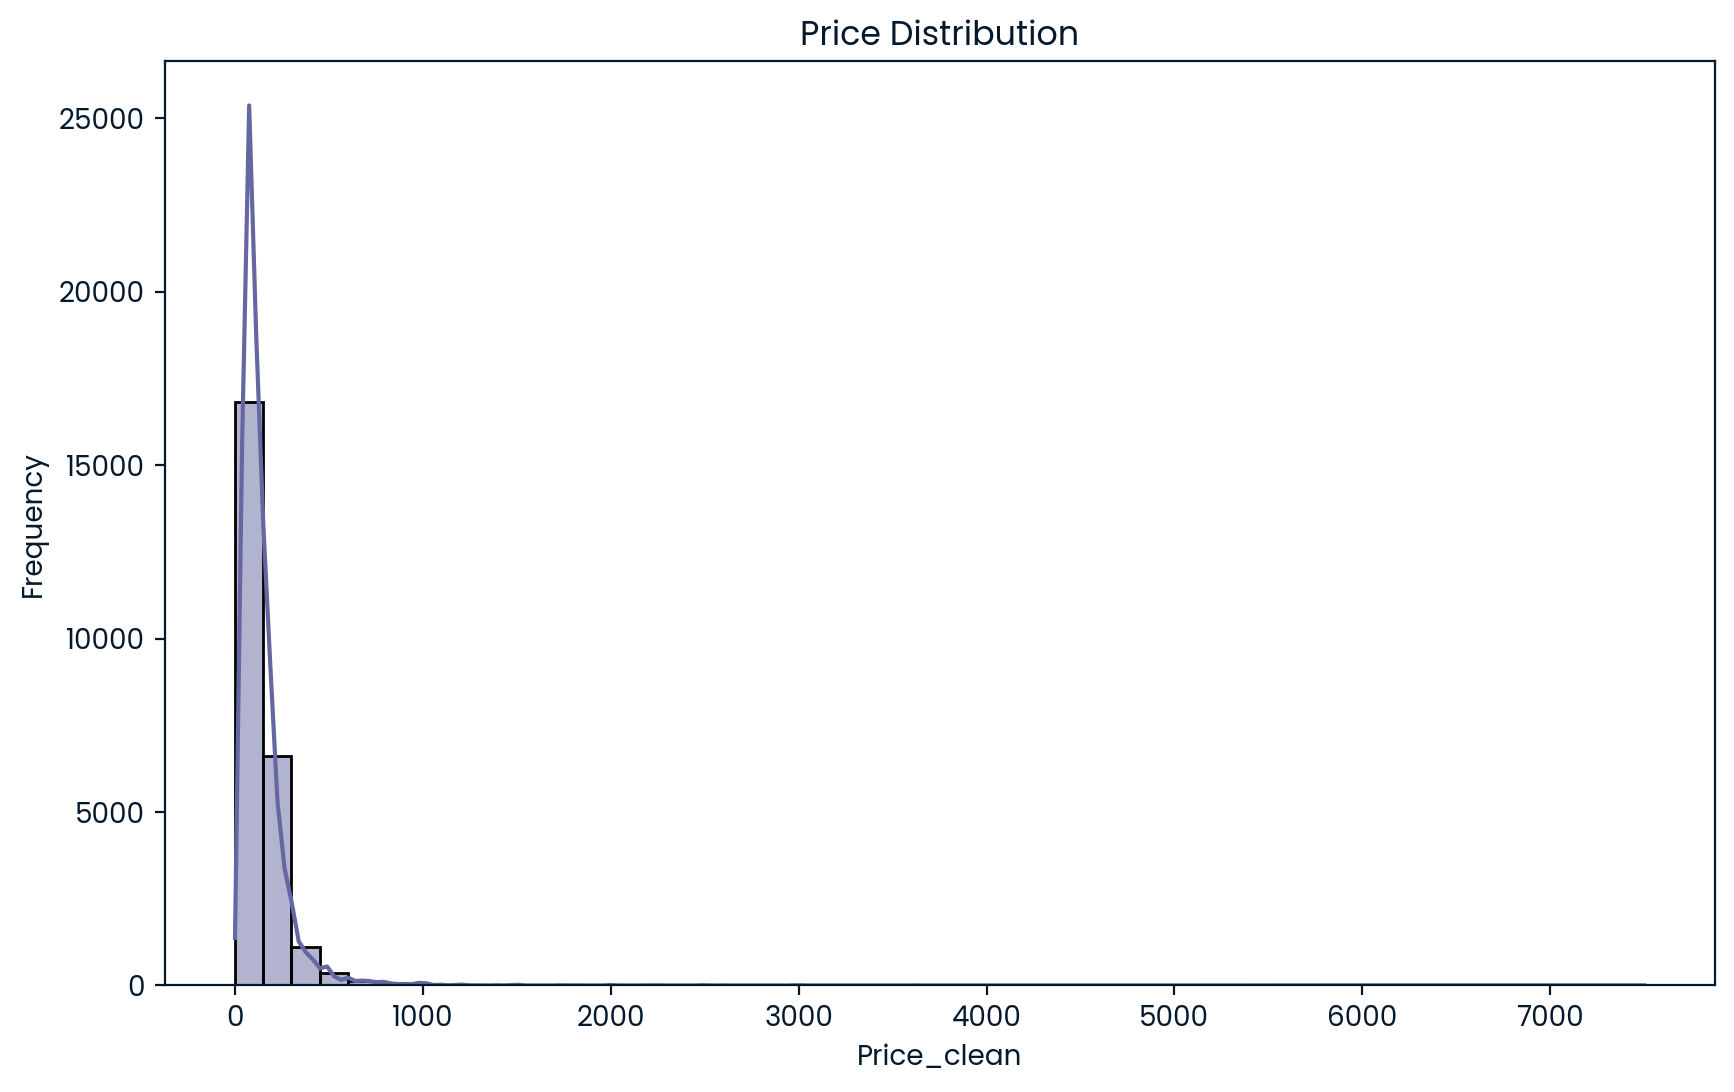

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(listings['price_clean'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price_clean')
plt.ylabel('Frequency')
plt.show()

# Average Price by Room Type

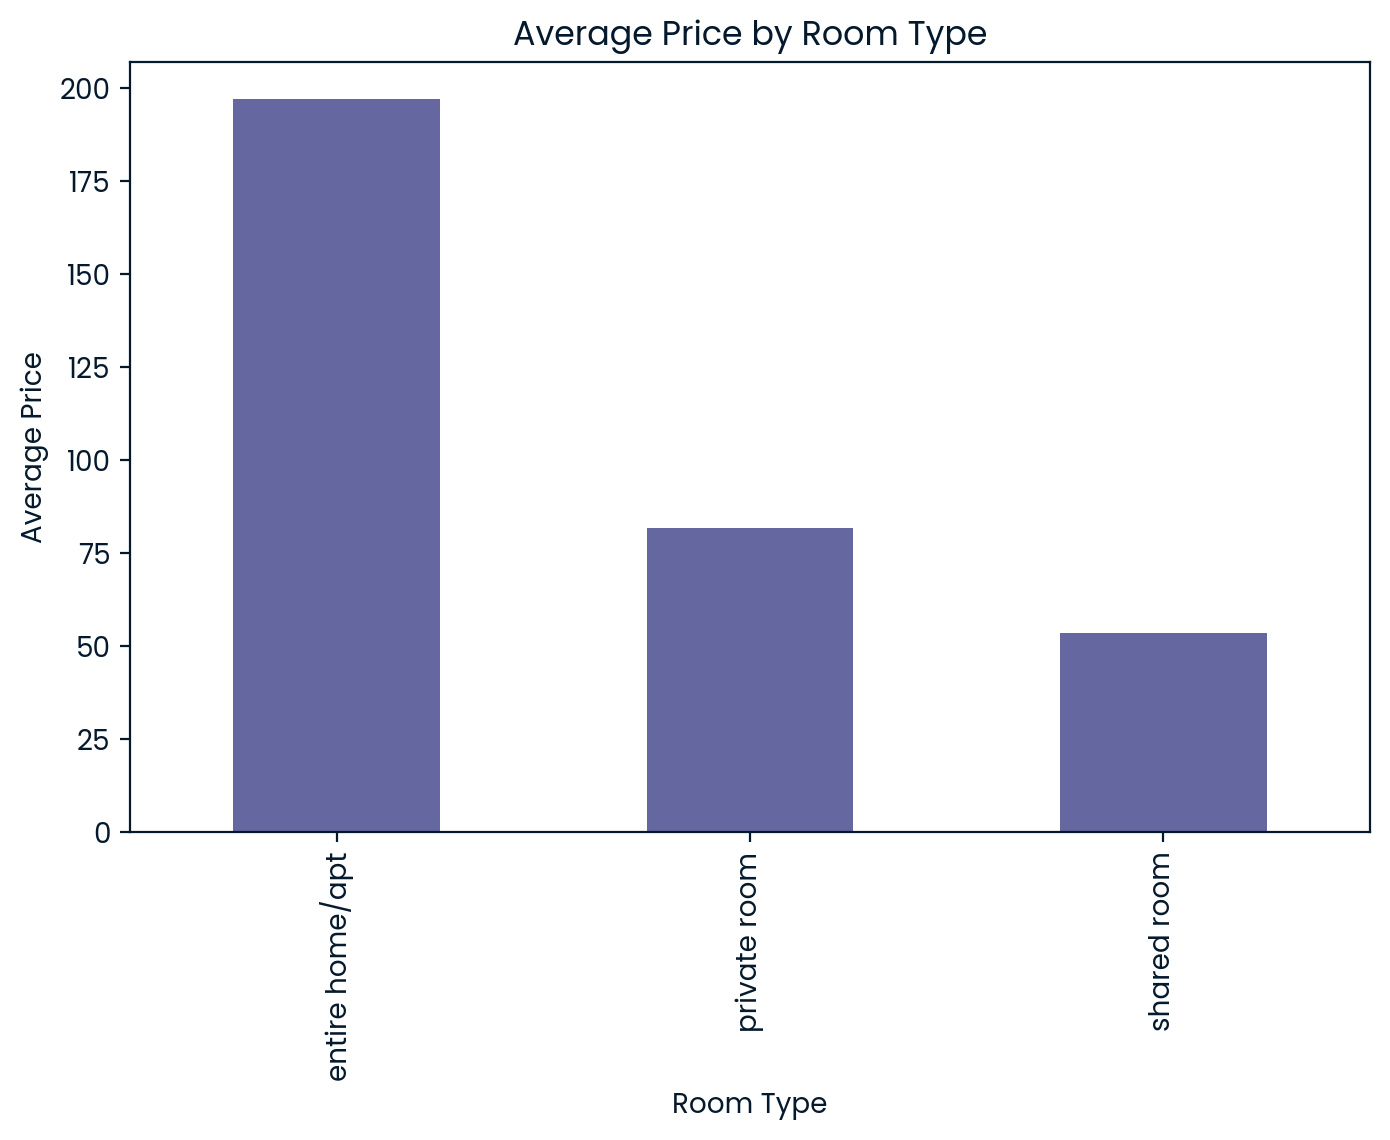

In [20]:
room_price = listings.groupby('room_type')['price_clean'].mean()

# Plotting average price by room type
room_price.plot(kind='bar', figsize=(8, 5), title='Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.show()

# Top 5 Neighborhood Prices

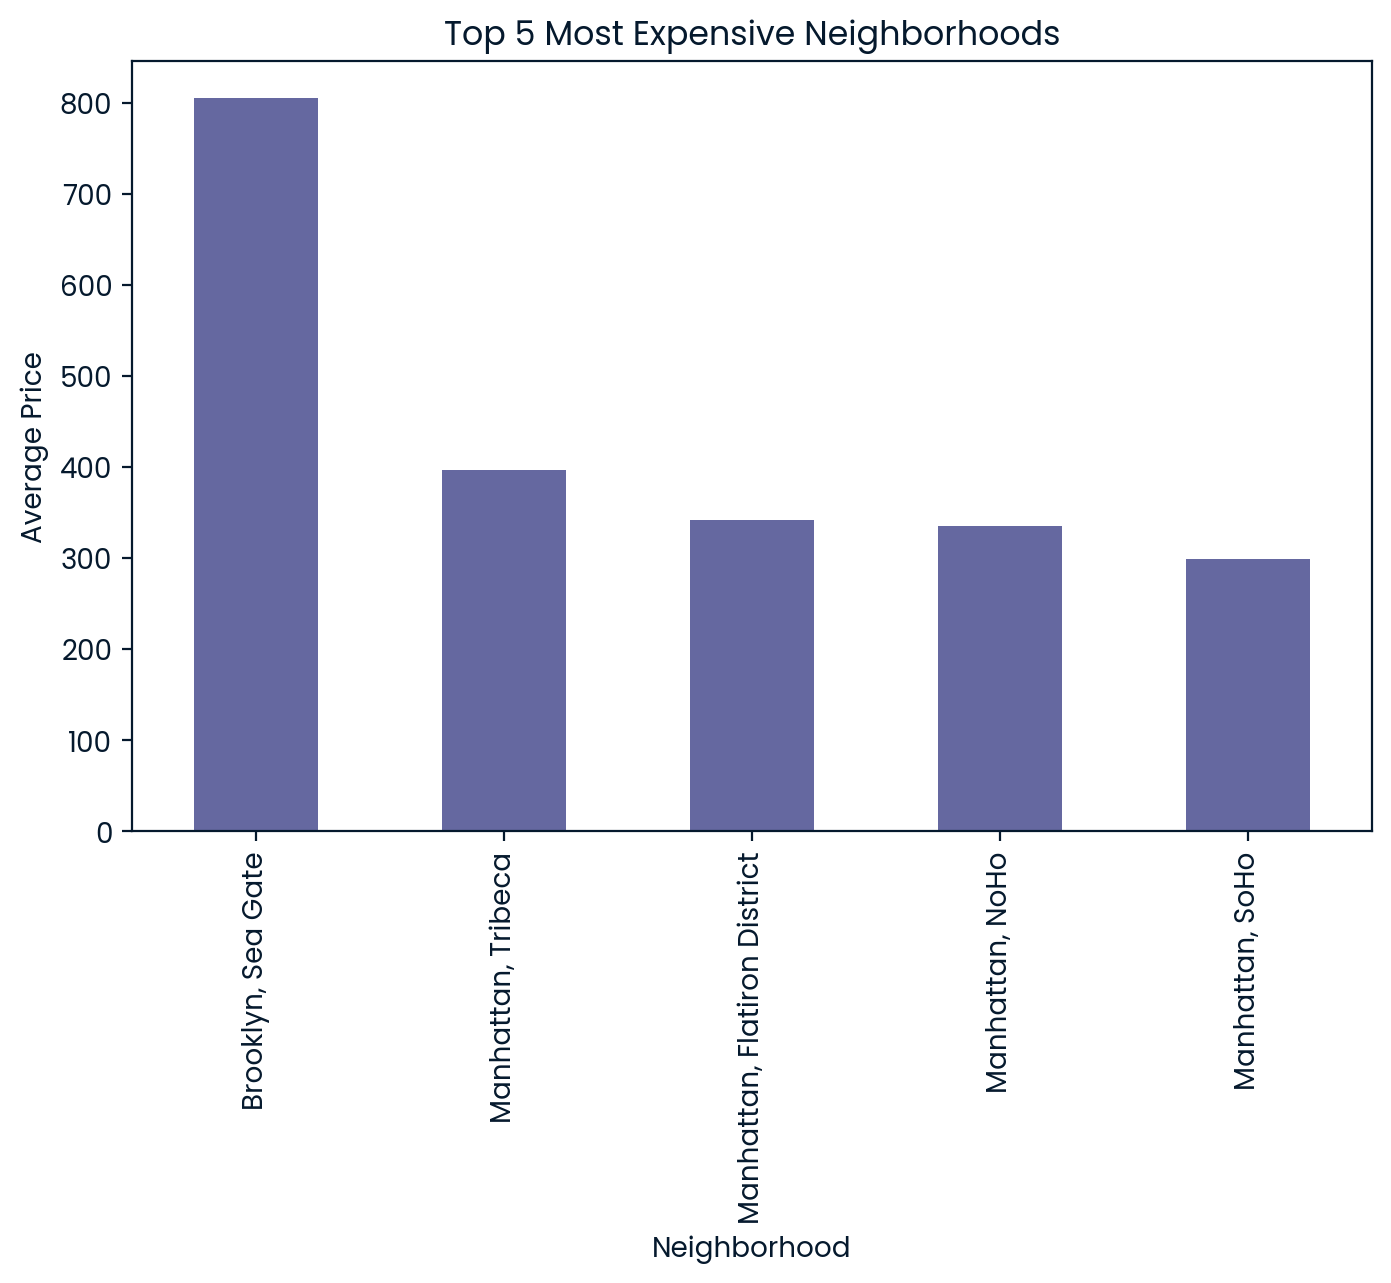

In [21]:
# Plot top 5 neighborhoods with highest average prices
top_neighborhoods = (
    listings.groupby('nbhood_full')['price_clean']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
top_neighborhoods.plot(kind='bar', figsize=(8, 5), title='Top 5 Most Expensive Neighborhoods')
plt.ylabel('Average Price')
plt.xlabel('Neighborhood')
plt.show()

# Reviews Over Time

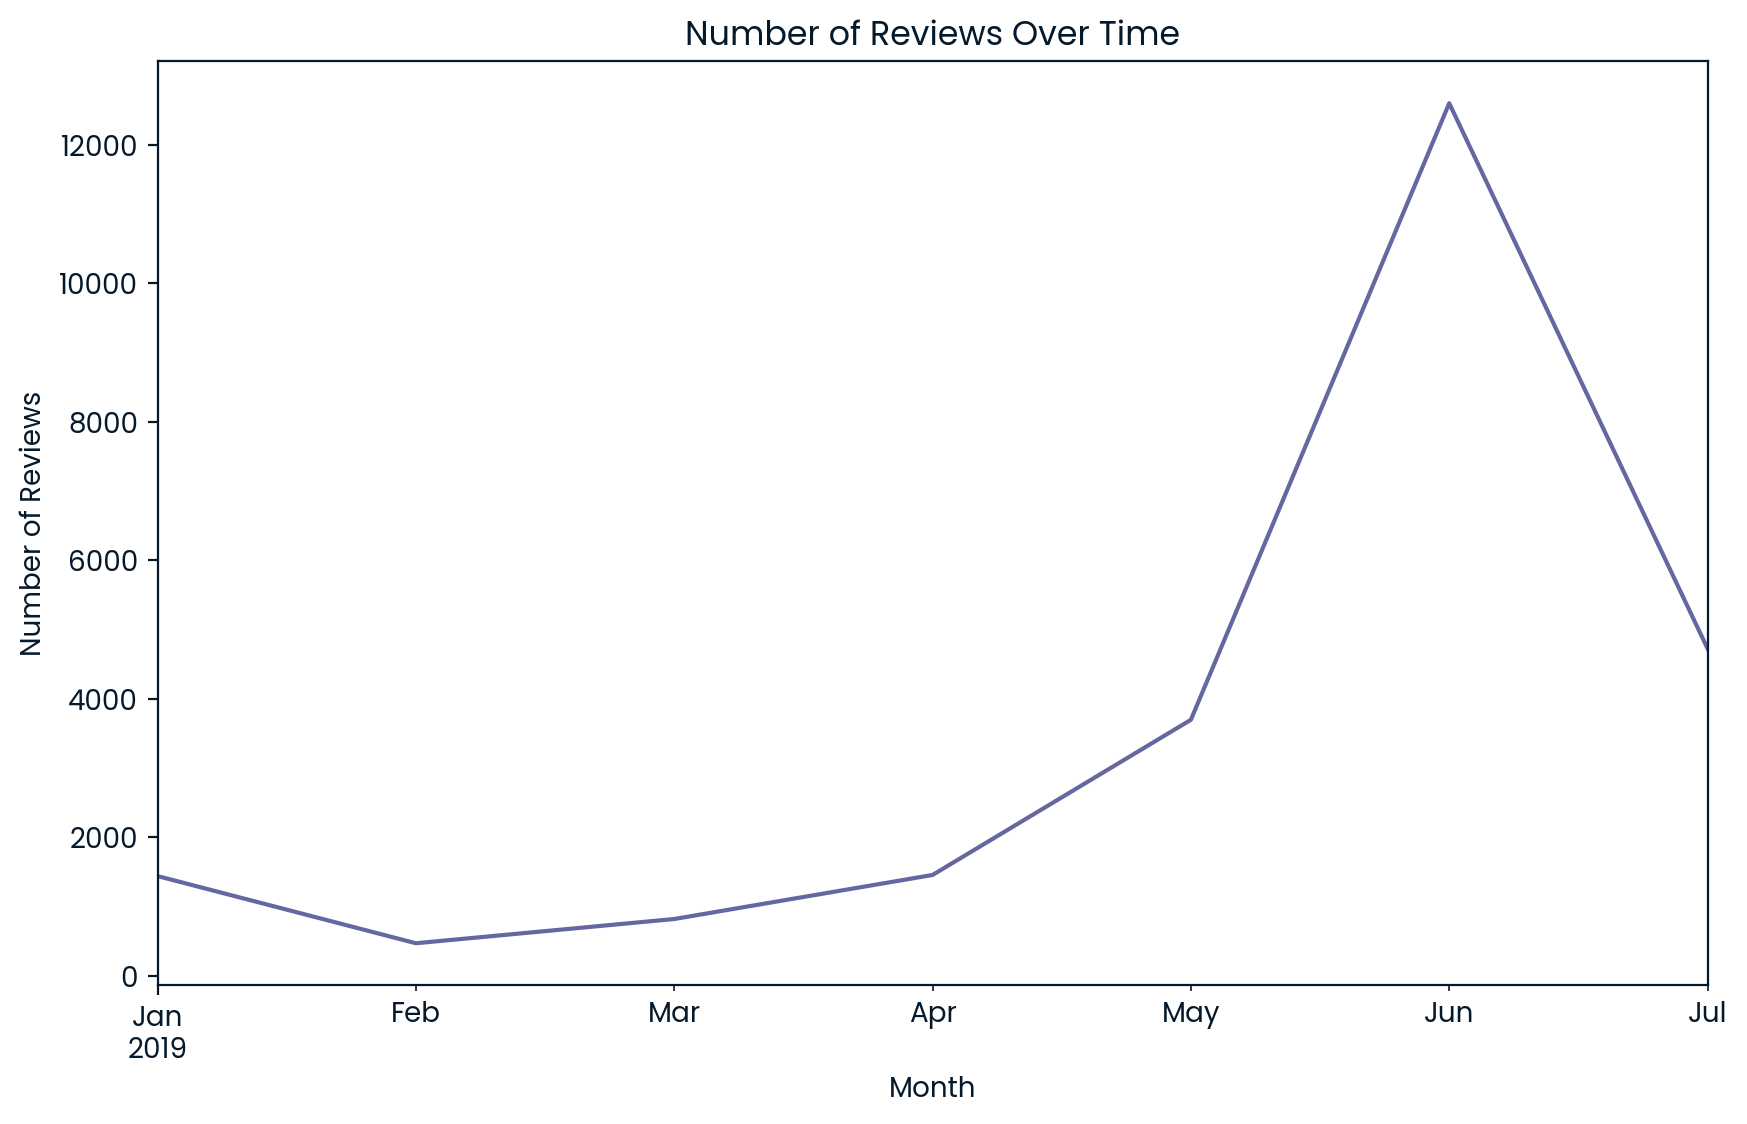

In [22]:
# Count reviews by month
review_trends = (
    listings['last_review_date']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)
# Plotting the number of reviews over time
review_trends.plot(figsize=(10, 6), title='Number of Reviews Over Time')
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.show()